In [ ]:
import pandas as pd
from pandas import to_datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
file_path = '/content/usd_predict.csv'
exchange_data = pd.read_csv(file_path)

# Converting 'date' to datetime format and sorting the data
exchange_data['date'] = to_datetime(exchange_data['date'])
exchange_data.sort_values('date', inplace=True)

# Splitting the dataset for ARIMA and Random Forest
train_size = int(len(exchange_data) * 0.8)
train, test = exchange_data.iloc[:train_size], exchange_data.iloc[train_size:]

# ARIMA Model parameters based on ACF and PACF analysis
p, d, q = 1, 0, 1

# ARIMA Model Training
arima_model = ARIMA(train['close'], order=(p, d, q))
arima_model_fit = arima_model.fit()

# Random Forest Model Preparation
# Creating lag features for Random Forest
train_rf = train.copy()
for lag in range(1, 4):  # Using 3 lags as an example
    train_rf[f'lag_{lag}'] = train_rf['close'].shift(lag)

# Dropping missing values created by lag features
train_rf.dropna(inplace=True)

# Feature and target separation
X = train_rf[['lag_1', 'lag_2', 'lag_3']]
y = train_rf['close']

# Train/Test Split for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Preparing Test Data for Random Forest Predictions
test_rf = test.copy()
for lag in range(1, 4):
    test_rf[f'lag_{lag}'] = test_rf['close'].shift(lag)
test_rf.dropna(inplace=True)

# ARIMA Predictions
arima_predictions = arima_model_fit.forecast(steps=len(test_rf))

# Random Forest Predictions
rf_predictions = rf_model.predict(test_rf[['lag_1', 'lag_2', 'lag_3']])

# Hybrid Model: Average of ARIMA and Random Forest predictions
hybrid_predictions = np.mean(np.column_stack((arima_predictions, rf_predictions)), axis=1)

# Evaluation Metrics
rmse = mean_squared_error(test_rf['close'], hybrid_predictions, squared=False)
mae = mean_absolute_error(test_rf['close'], hybrid_predictions)
mape = mean_absolute_percentage_error(test_rf['close'], hybrid_predictions)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 0.24510849985131408
MAE: 0.1851775044848176
MAPE: 0.21816951076907215


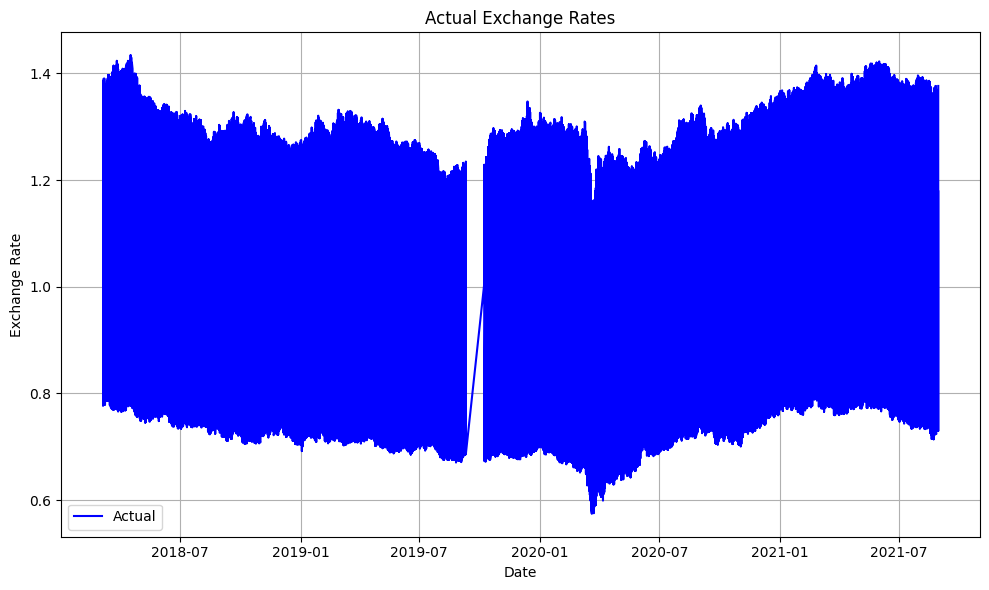

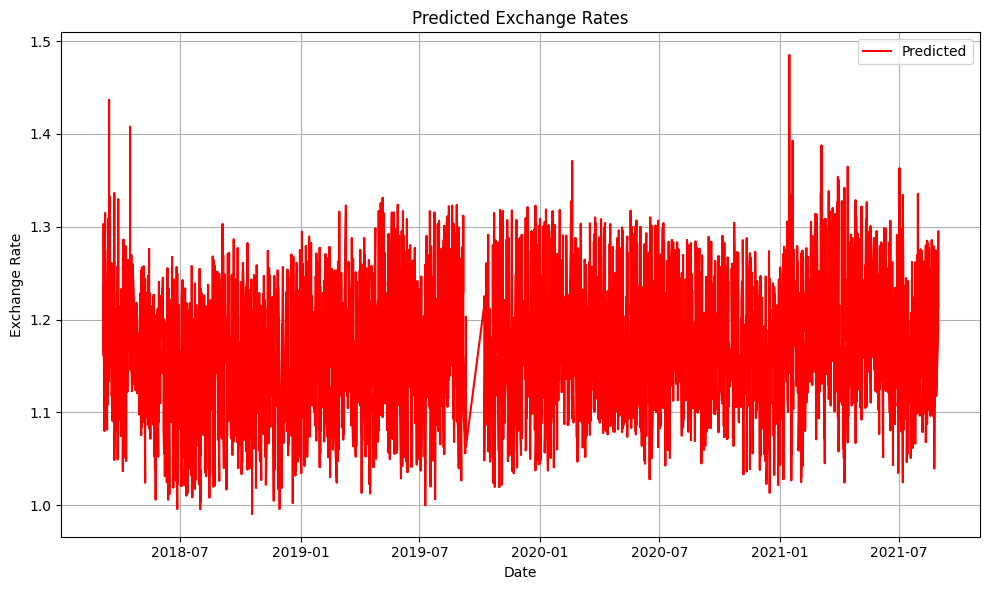

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'date' column is a datetime type and set as index
test_rf['date'] = pd.to_datetime(test_rf['date'])
test_rf.set_index('date', inplace=True)


# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(test_rf['close'], label='Actual', color='blue')
plt.legend()
plt.title('Actual Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

# Plotting the predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_rf.index, hybrid_predictions, label='Predicted', color='red')
plt.legend()
plt.title('Predicted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from pandas import to_datetime
from statsmodels.tsa.stattools import adfuller, acf, pacf
import matplotlib.pyplot as plt

# Load the dataset
exchange_data = pd.read_csv('/content/usd_predict.csv')

# Convert 'date' to datetime format and sort the data
exchange_data['date'] = to_datetime(exchange_data['date'])
exchange_data.sort_values('date', inplace=True)

# Perform Dickey-Fuller test
adf_test = adfuller(exchange_data['close'])

# ACF and PACF plots
lags = 40  # Or another number based on dataset size

# Plot ACF
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(exchange_data['close'], lags=lags, ax=plt.gca())

# Plot PACF
plt.subplot(122)
plot_pacf(exchange_data['close'], lags=lags, ax=plt.gca())

plt.tight_layout()
plt.show()


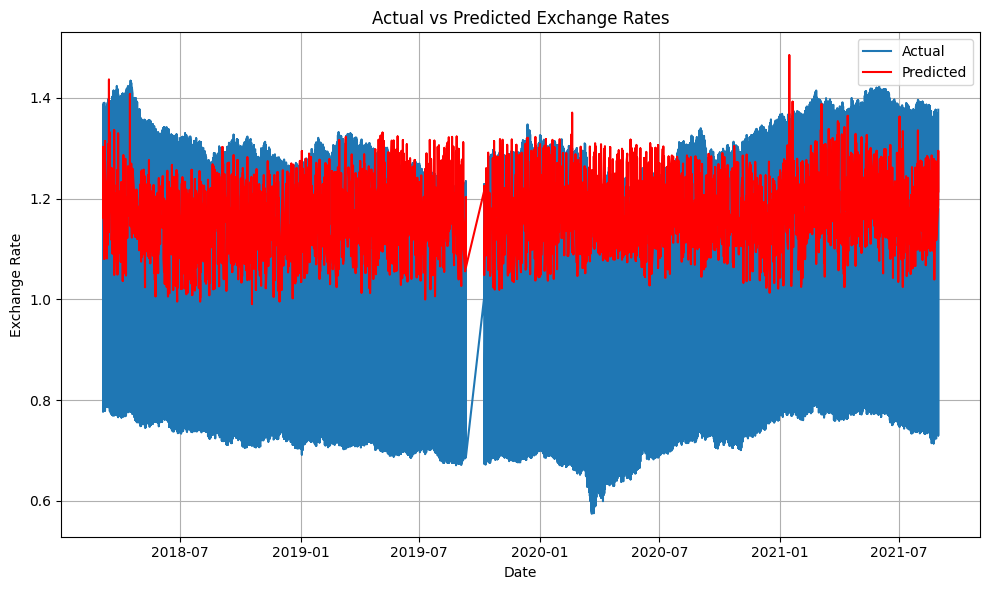

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_rf['close'], label='Actual')
plt.plot(test_rf.index, hybrid_predictions, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.tight_layout()
plt.show()